## Setup

In [1]:
import torchvision.transforms as tfs
from src.models.utils import download_checkpoint, load_model
from src.experiments import *
from src.experiments.utils import *
from src.visualization import *
from src.optimization import *
from src.optimization.optimizers import NormalizedOptimizer
from IPython.display import Image 
from PIL import Image

checkpoint_path = download_checkpoint("https://drive.google.com/file/d/19m_SaRNEF7JXHjeyNu26AxgaEQXqpI00", "protopnet.pt")
model = load_model('protopnet', checkpoint_path, device="cpu")
img_size = 224

## Try different optimizers and clamping/normalization

In [2]:
import numpy as np

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

def deprocess(image_np):
    image_np = image_np.squeeze().transpose(1, 2, 0)
    image_np = image_np * std.reshape((1, 1, 3)) + mean.reshape((1, 1, 3))
    image_np = np.clip(image_np, 0.0, 255.0)
    return image_np

lr: 0.1 | optimizer: <class 'torch.optim.adam.Adam'>
step: 0/500, loss: -0.09313959628343582


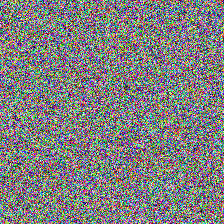

step: 100/500, loss: -1.8528530597686768
step: 200/500, loss: -2.2333900928497314
step: 300/500, loss: -1.980240821838379
step: 400/500, loss: -1.9135706424713135


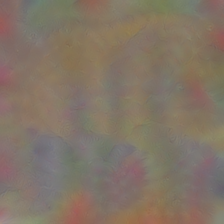

lr: 0.1 | optimizer: <class 'src.optimization.optimizers.NormalizedOptimizer'>
step: 0/500, loss: -0.09324797987937927


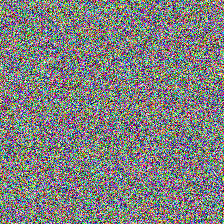

step: 100/500, loss: -0.9489871263504028
step: 200/500, loss: -1.2942928075790405
step: 300/500, loss: -1.0741468667984009
step: 400/500, loss: -1.2975972890853882


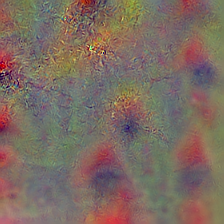

lr: 0.2 | optimizer: <class 'torch.optim.adam.Adam'>
step: 0/500, loss: -0.09415025264024734


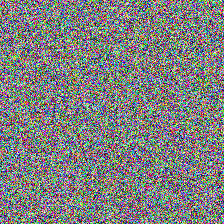

step: 100/500, loss: -2.133028030395508
step: 200/500, loss: -1.9139167070388794
step: 300/500, loss: -2.0307064056396484
step: 400/500, loss: -1.6251176595687866


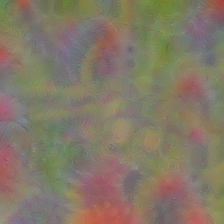

lr: 0.2 | optimizer: <class 'src.optimization.optimizers.NormalizedOptimizer'>
step: 0/500, loss: -0.09440148621797562


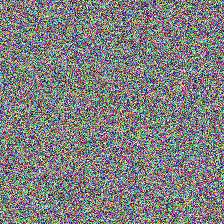

step: 100/500, loss: -0.9151685237884521
step: 200/500, loss: -0.8361432552337646
step: 300/500, loss: -0.7050576210021973
step: 400/500, loss: -0.8184270858764648


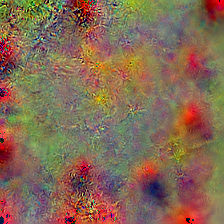

In [3]:
from src.optimization.utils import NormalizationMinMax, ClampingMinMax, ClampingMeanStd, NormalizationMeanStd, BeforeOptimFn

ptypes = [(188,1)]
size = (3, img_size, img_size)

lrs = [0.1, 0.2]
optimizers = [torch.optim.Adam, NormalizedOptimizer]

for lr in lrs:
    for optimizer in optimizers:
            print(f"lr: {lr} | optimizer: {optimizer}")
            input_tensor = torch.randn(size)
            before_optim_fn = BeforeOptimFn([tfs.GaussianBlur(7, 2), ClampingMeanStd()])
            image = visualize_prototypes(model, ptypes, optimization_steps=500, input_tensor=input_tensor,
                                             before_optim_step=before_optim_fn, optimizer_cls=optimizer, optimizer_kwargs={'lr': lr}, print_interval=100)
            
            # Denormalization should be use in some cases
            image = image.cpu().data.numpy()
            image = deprocess(image).transpose(2,0,1)
            image = torch.from_numpy(image)
            
            pilimg = tfs.ToPILImage()(image)
            display(pilimg)